In [1]:
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, precision_recall_curve
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
%matplotlib inline

In [2]:
df = pd.read_csv("Datafile1.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

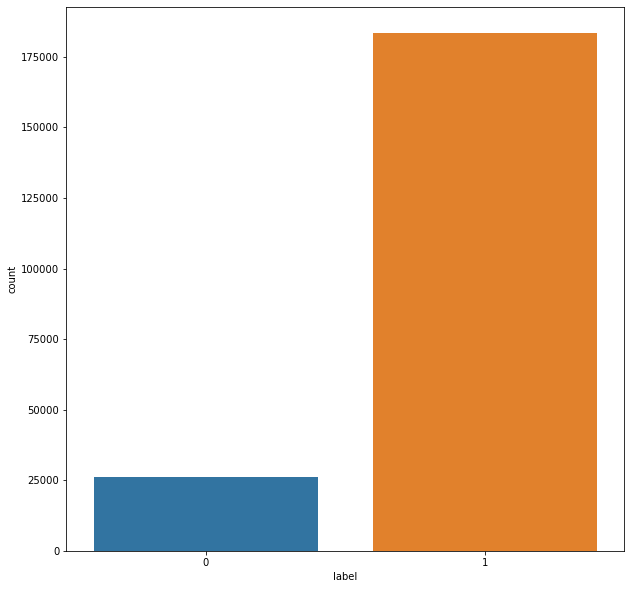

Percentage of non defaulter: 12.48%
Percentage of defaulter: 87.52%


(209593, 33)

In [3]:
df.head()

df.shape

df.columns

df.info()

df.isnull().sum()

df['label'].value_counts()

df.drop(['msisdn'], axis = 1,inplace=True)

df['pcircle'].value_counts()

df.drop(['pdate'], axis = 1,inplace=True)

df.drop(['pcircle'], axis = 1,inplace=True)

df.drop("Unnamed: 0",axis=1,inplace=True)

df.head()

plt.figure(figsize=(10,10))
sns.countplot(x="label", data=df)
plt.show()

countofdefaulter = len(df[df.label == 0])
countofnotdefaulter = len(df[df.label == 1])
print("Percentage of non defaulter: {:.2f}%".format((countofdefaulter / (len(df.label))*100)))
print("Percentage of defaulter: {:.2f}%".format((countofnotdefaulter / (len(df.label))*100)))

df.describe()

df.shape


<AxesSubplot:ylabel='Density'>

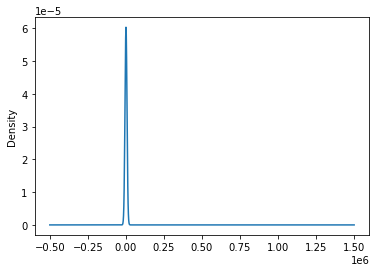

In [4]:
df.aon.plot(kind='density')

In [5]:
df_label = df.iloc[:,0]

In [6]:
df.drop("label",axis=1,inplace=True)


headnames=[str(i) for i in df.columns]

from sklearn.preprocessing import Normalizer
scaller=Normalizer()
df = scaller.fit_transform(df)

type(df)

df=pd.DataFrame(df,columns=headnames[0:])

df.shape

df.head()


aon  daily_decr30  daily_decr90  rental30  rental90  \
0  0.040558      0.455545      0.457051  0.032824  0.038789   
1  0.032192      0.548083      0.548207  0.166896  0.166896   
2  0.127283      0.332602      0.332602  0.214152  0.214152   
3  0.143966      0.012681      0.012681  0.095233  0.095233   
4  0.030319      0.004822      0.004822  0.035182  0.035182   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0           0.000298                0.0          0.229483       0.000298   
1           0.000904                0.0          0.261653       0.000045   
2           0.000714                0.0          0.366148       0.000238   
3           0.024492                0.0          0.565709       0.000000   
4           0.000128                0.0          0.073925       0.000224   

   fr_ma_rech30  ...  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0      0.003131  ...     0.000298      0.001789         0.000895   
1      0.000000  ...     0.000045      0.000543         0.000543   
2      0.000000  ...     0.000238      0.001427         0.001427   
3      0.000000  ...     0.001195      0.007168         0.003584   
4      0.000064  ...     0.000224      0.001345         0.000192   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0     0.000298      0.001789         0.000895   
1                 0.0     0.000045      0.000543         0.000543   
2                 0.0     0.000238      0.001427         0.001427   
3                 0.0     0.001195      0.007168         0.003584   
4                 0.0     0.000224      0.001345         0.000192   

   medianamnt_loans90  payback30  payback90  
0                 0.0   0.004324   0.004324  
1                 0.0   0.000000   0.000000  
2                 0.0   0.000000   0.000000  
3                 0.0   0.000000   0.000000  
4                 0.0   0.000075   0.000075  

[5 rows x 32 columns]

In [7]:
df = pd.concat([df,df_label], axis=1)
df.head()


aon  daily_decr30  daily_decr90  rental30  rental90  \
0  0.040558      0.455545      0.457051  0.032824  0.038789   
1  0.032192      0.548083      0.548207  0.166896  0.166896   
2  0.127283      0.332602      0.332602  0.214152  0.214152   
3  0.143966      0.012681      0.012681  0.095233  0.095233   
4  0.030319      0.004822      0.004822  0.035182  0.035182   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0           0.000298                0.0          0.229483       0.000298   
1           0.000904                0.0          0.261653       0.000045   
2           0.000714                0.0          0.366148       0.000238   
3           0.024492                0.0          0.565709       0.000000   
4           0.000128                0.0          0.073925       0.000224   

   fr_ma_rech30  ...  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
0      0.003131  ...      0.001789         0.000895                 0.0   
1      0.000000  ...      0.000543         0.000543                 0.0   
2      0.000000  ...      0.001427         0.001427                 0.0   
3      0.000000  ...      0.007168         0.003584                 0.0   
4      0.000064  ...      0.001345         0.000192                 0.0   

   cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
0     0.000298      0.001789         0.000895                 0.0   0.004324   
1     0.000045      0.000543         0.000543                 0.0   0.000000   
2     0.000238      0.001427         0.001427                 0.0   0.000000   
3     0.001195      0.007168         0.003584                 0.0   0.000000   
4     0.000224      0.001345         0.000192                 0.0   0.000075   

   payback90  label  
0   0.004324      0  
1   0.000000      1  
2   0.000000      1  
3   0.000000      1  
4   0.000075      1  

[5 rows x 33 columns]

In [8]:
x = df.drop(labels=['label'],axis=1)
y = df.iloc[:,-1]

x

y

from scipy import stats
x[(np.abs(stats.zscore(x))<3).all(axis=1)]


aon  daily_decr30  daily_decr90  rental30  rental90  \
0       0.040558      0.455545      0.457051  0.032824  0.038789   
1       0.032192      0.548083      0.548207  0.166896  0.166896   
2       0.127283      0.332602      0.332602  0.214152  0.214152   
4       0.030319      0.004822      0.004822  0.035182  0.035182   
5       0.040807      0.162178      0.162472  0.026448  0.027310   
...          ...           ...           ...       ...       ...   
209588  0.025266      0.009498      0.009498  0.068118  0.068118   
209589  0.182149      0.006258      0.006258  0.292856  0.292856   
209590  0.035028      0.409517      0.411634  0.202693  0.307513   
209591  0.061433      0.442953      0.446008  0.014607  0.034923   
209592  0.068327      0.194021      0.195985  0.020914  0.027279   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                0.000298           0.000000          0.229483       0.000298   
1                0.000904           0.000000          0.261653       0.000045   
2                0.000714           0.000000          0.366148       0.000238   
4                0.000128           0.000000          0.073925       0.000224   
5                0.000144           0.000000          0.110568       0.000287   
...                   ...                ...               ...            ...   
209588           0.000063           0.000000          0.253163       0.000188   
209589           0.000678           0.000000          0.130978       0.000678   
209590           0.000104           0.000000          0.053216       0.000173   
209591           0.000071           0.001348          0.027418       0.000177   
209592           0.000562           0.000000          0.325258       0.000086   

        fr_ma_rech30  ...  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0           0.003131  ...     0.000298      0.001789         0.000895   
1           0.000000  ...     0.000045      0.000543         0.000543   
2           0.000000  ...     0.000238      0.001427         0.001427   
4           0.000064  ...     0.000224      0.001345         0.000192   
5           0.000718  ...     0.000216      0.001293         0.000431   
...              ...  ...          ...           ...              ...   
209588      0.000125  ...     0.000125      0.000750         0.000375   
209589      0.000169  ...     0.000508      0.003050         0.001017   
209590      0.000277  ...     0.000138      0.001452         0.000415   
209591      0.000142  ...     0.000071      0.000638         0.000426   
209592      0.000043  ...     0.000086      0.000778         0.000519   

        medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                      0.0     0.000298      0.001789         0.000895   
1                      0.0     0.000045      0.000543         0.000543   
2                      0.0     0.000238      0.001427         0.001427   
4                      0.0     0.000224      0.001345         0.000192   
5                      0.0     0.000216      0.001293         0.000431   
...                    ...          ...           ...              ...   
209588                 0.0     0.000125      0.000750         0.000375   
209589                 0.0     0.000508      0.003050         0.001017   
209590                 0.0     0.000207      0.001867         0.000415   
209591                 0.0     0.000106      0.000851         0.000426   
209592                 0.0     0.000086      0.000778         0.000519   

        medianamnt_loans90  payback30  payback90  
0                      0.0   0.004324   0.004324  
1                      0.0   0.000000   0.000000  
2                      0.0   0.000000   0.000000  
4                      0.0   0.000075   0.000075  
5                      0.0   0.000790   0.000599  
...                    ...        ...        ...  
209588                 0.0   0.000063   0.000063  
209589                 0.0   0.000169   0.000169 

C:\Users\AKSHAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Delinquency')

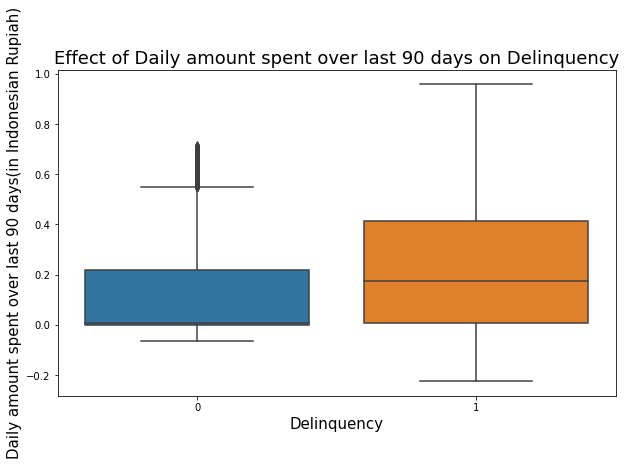

In [9]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(y, x['daily_decr90'])
ax.set_title('Effect of Daily amount spent over last 90 days on Delinquency', fontsize=18)
ax.set_ylabel('Daily amount spent over last 90 days(in Indonesian Rupiah)', fontsize = 15)
ax.set_xlabel('Delinquency', fontsize = 15)

C:\Users\AKSHAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Delinquency')

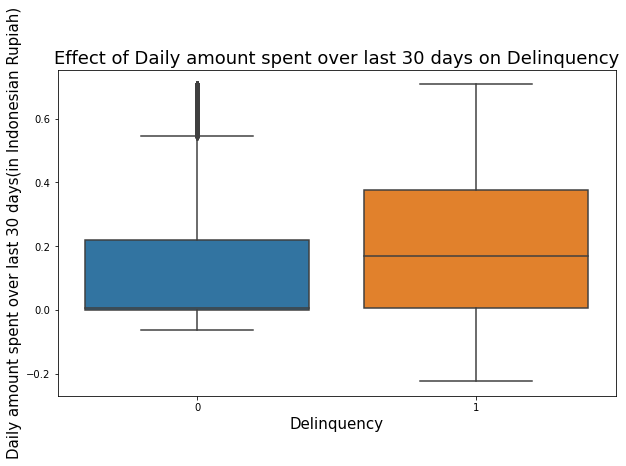

In [10]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(y, x['daily_decr30'])
ax.set_title('Effect of Daily amount spent over last 30 days on Delinquency', fontsize=18)
ax.set_ylabel('Daily amount spent over last 30 days(in Indonesian Rupiah)', fontsize = 15)
ax.set_xlabel('Delinquency', fontsize = 15)

C:\Users\AKSHAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Delinquency')

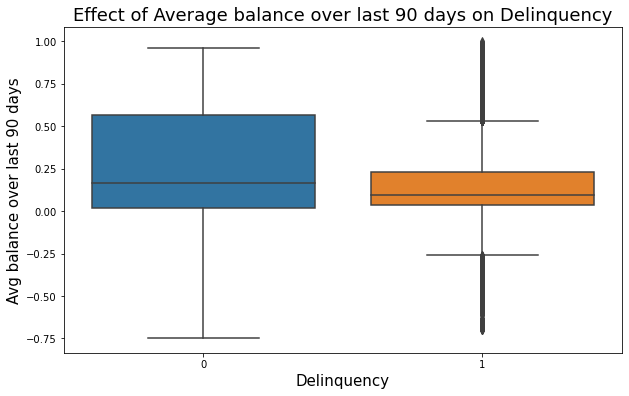

In [11]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(y, x['rental90'])
ax.set_title('Effect of Average balance over last 90 days on Delinquency', fontsize=18)
ax.set_ylabel('Avg balance over last 90 days', fontsize = 15)
ax.set_xlabel('Delinquency', fontsize = 15)

C:\Users\AKSHAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Delinquency')

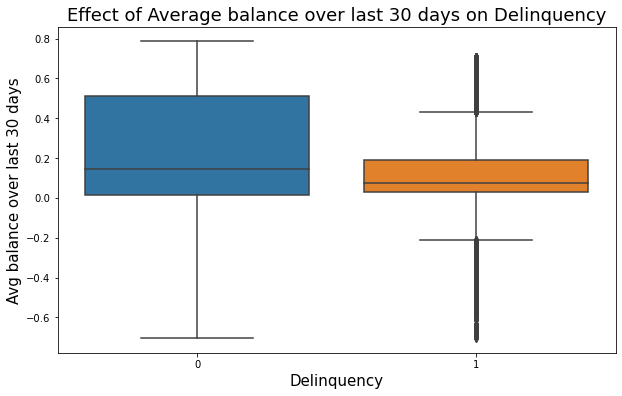

In [12]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(y, x['rental30'])
ax.set_title('Effect of Average balance over last 30 days on Delinquency', fontsize=18)
ax.set_ylabel('Avg balance over last 30 days', fontsize = 15)
ax.set_xlabel('Delinquency', fontsize = 15)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(146715, 32)
(62878, 32)
(146715,)
(62878,)


In [ ]:
from sklearn.metrics import f1_score,roc_curve, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform



Random Forest...
              precision    recall  f1-score   support

           0       0.42      0.76      0.54      4426
           1       0.98      0.92      0.95     58452

    accuracy                           0.91     62878
   macro avg       0.70      0.84      0.75     62878
weighted avg       0.94      0.91      0.92     62878



(2.0, -0.1)

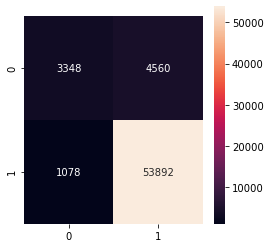

In [17]:
def evaluate_model(model):
    model.fit(x_train,y_train)
    prediction_test = model.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, prediction_test)
    rocauc = metrics.roc_auc_score(y_test, prediction_test)
    return accuracy,rocauc,prediction_test
rf =RandomForestClassifier()
rf.fit(x_train,y_train)
acc,rocauc,testpred_rf  = evaluate_model(rf)
print('Random Forest...')
Y_RFpred=rf.predict(x_test)
print(classification_report(Y_RFpred,y_test))

cm_RF = confusion_matrix(y_test, Y_RFpred)
_,ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm_RF,annot=True,fmt="d")
ax.set_ylim(2,-0.1)


C:\Users\AKSHAT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression...
              precision    recall  f1-score   support

           0       0.12      0.55      0.19      1648
           1       0.99      0.89      0.93     61230

    accuracy                           0.88     62878
   macro avg       0.55      0.72      0.56     62878
weighted avg       0.96      0.88      0.91     62878



(2.0, -0.1)

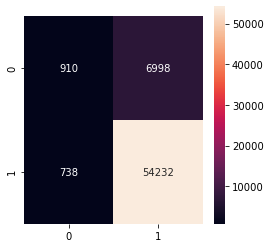

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
acc,rocauc,testpred_lr  = evaluate_model(lr)
print('Logistic Regression...')
Y_LRpred=lr.predict(x_test)
print(classification_report(Y_LRpred,y_test))

cm_LR = confusion_matrix(y_test, Y_LRpred)
_,ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm_LR,annot=True,fmt="d")
ax.set_ylim(2,-0.1)

Decision Tree Classifier...
              precision    recall  f1-score   support

           0       0.49      0.46      0.47      8341
           1       0.92      0.93      0.92     54537

    accuracy                           0.86     62878
   macro avg       0.70      0.69      0.70     62878
weighted avg       0.86      0.86      0.86     62878



(2.0, -0.1)

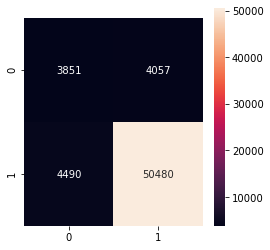

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt =DecisionTreeClassifier()
dt.fit(x_train,y_train)
acc,rocauc,testpred_dt = evaluate_model(dt)
print('Decision Tree Classifier...')
Y_DTpred=dt.predict(x_test)
print(classification_report(Y_DTpred,y_test))

cm_DT = confusion_matrix(y_test, Y_DTpred)
_,ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm_DT,annot=True,fmt="d")
ax.set_ylim(2,-0.1)

Gaussian Navie Bayes...
              precision    recall  f1-score   support

           0       0.49      0.46      0.48      8313
           1       0.92      0.93      0.92     54565

    accuracy                           0.86     62878
   macro avg       0.70      0.70      0.70     62878
weighted avg       0.86      0.86      0.86     62878



(2.0, -0.1)

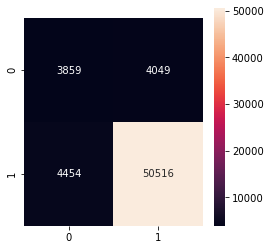

In [20]:
from sklearn.naive_bayes import GaussianNB
gnb =DecisionTreeClassifier()
gnb.fit(x_train,y_train)
acc,rocauc,testpred_gnb = evaluate_model(gnb)
print('Gaussian Navie Bayes...')
Y_GNBpred=gnb.predict(x_test)
print(classification_report(Y_GNBpred,y_test))

cm_GNB = confusion_matrix(y_test, Y_GNBpred)
_,ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm_GNB,annot=True,fmt="d")
ax.set_ylim(2,-0.1)

Support vector classifier...
              precision    recall  f1-score   support

           0       0.49      0.46      0.47      8324
           1       0.92      0.93      0.92     54554

    accuracy                           0.86     62878
   macro avg       0.70      0.69      0.70     62878
weighted avg       0.86      0.86      0.86     62878



(2.0, -0.1)

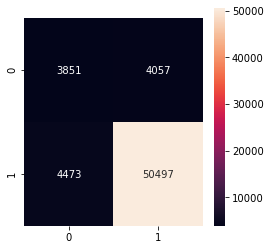

In [21]:
from sklearn.svm import SVC
svc =DecisionTreeClassifier()
svc.fit(x_train,y_train)
acc,rocauc,testpred_svc = evaluate_model(svc)
print('Support vector classifier...')
Y_SVCpred=svc.predict(x_test)
print(classification_report(Y_SVCpred,y_test))

cm_SVC = confusion_matrix(y_test, Y_SVCpred)
_,ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm_SVC,annot=True,fmt="d")
ax.set_ylim(2,-0.1)

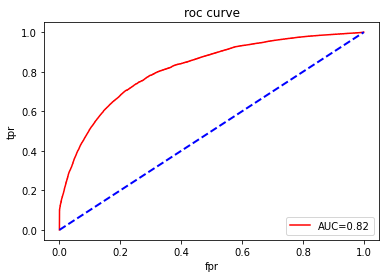

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
preds=lr.predict_proba(x)[:,1]
fpr,tpr,thershold=roc_curve(y,preds,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,'r',label='AUC=%0.2f'% roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.show()

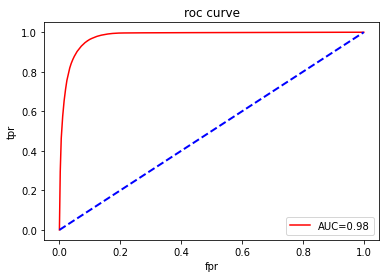

In [23]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
preds=rf.predict_proba(x)[:,1]
fpr,tpr,thershold=roc_curve(y,preds,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,'r',label='AUC=%0.2f'% roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.show()

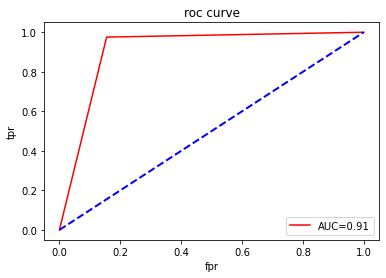

In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
preds=dt.predict_proba(x)[:,1]
fpr,tpr,thershold=roc_curve(y,preds,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,'r',label='AUC=%0.2f'% roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.show()

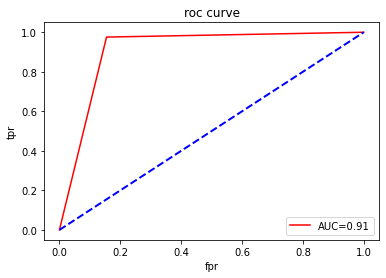

In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
preds=gnb.predict_proba(x)[:,1]
fpr,tpr,thershold=roc_curve(y,preds,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,'r',label='AUC=%0.2f'% roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.show()


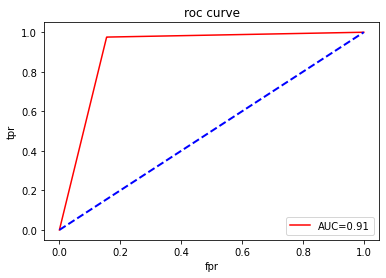

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
preds=svc.predict_proba(x)[:,1]
fpr,tpr,thershold=roc_curve(y,preds,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,'r',label='AUC=%0.2f'% roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.show()

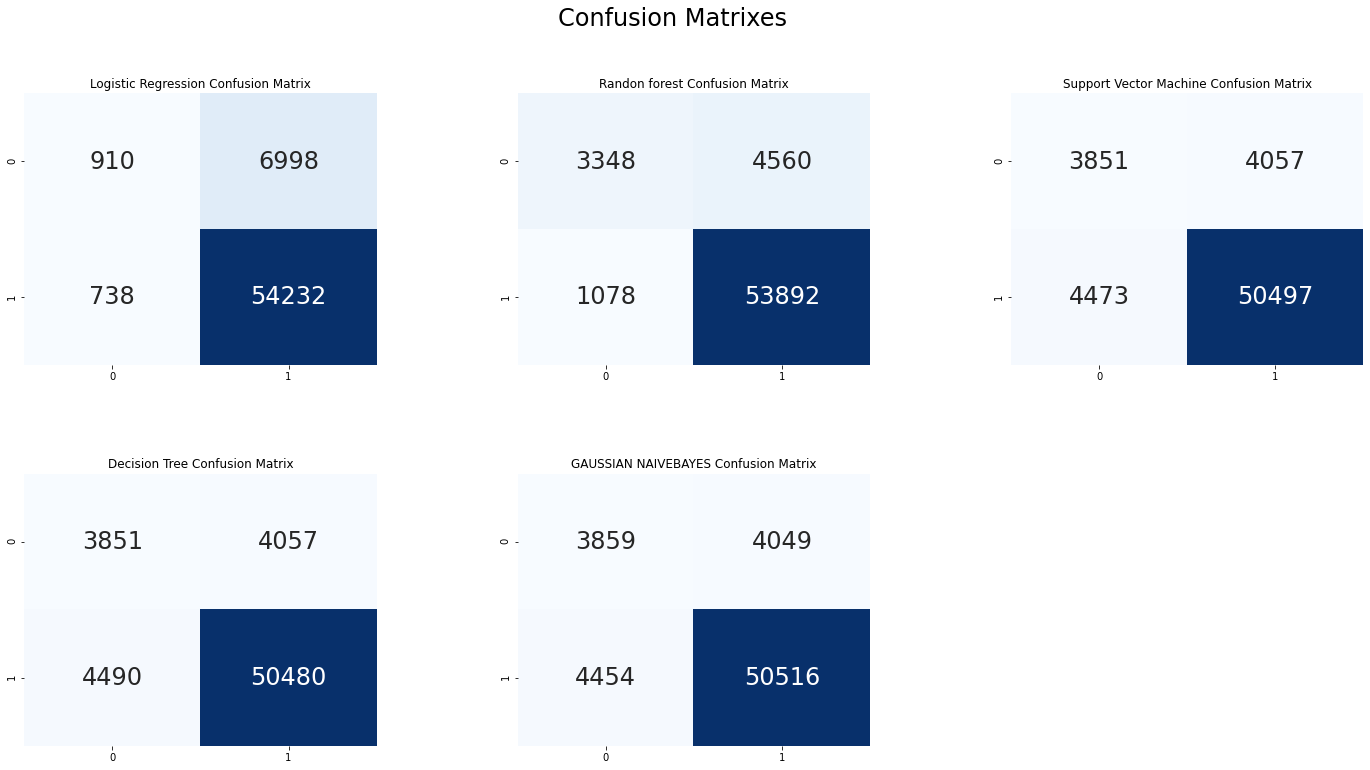

In [27]:
y_head_lr = lr.predict(x_test)
y_head_dt = dt.predict(x_test)
y_head_svc = svc.predict(x_test)
y_head_gnb = gnb.predict(x_test)
y_head_rf = rf.predict(x_test)

from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_dt = confusion_matrix(y_test,y_head_dt)
cm_rf = confusion_matrix(y_test,y_head_rf)
cm_svc = confusion_matrix(y_test,y_head_svc)
cm_gnb = confusion_matrix(y_test,y_head_gnb)

plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Randon forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(cm_dt,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("GAUSSIAN NAIVEBAYES Confusion Matrix")
sns.heatmap(cm_gnb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()